# wall follow  
Casen er fra 2.semester:
- https://eaaa.instructure.com/courses/17030/files/982828?module_item_id=522476


Løsningsmodellen er inspireret af Tensorflow in 10 min..
- https://www.youtube.com/watch?v=6_2hzRopPbQ&t=5s


# Installer libraries

In [1]:
!python.exe -m pip install --upgrade pip

!pip install pandas

!pip install scikit-learn   

!pip install tensorflow

!pip install numpy

!pip install matplotlib

# Brug Panda til at læse (og vise) data fra csv-regnearket som indeholder træningsdata

In [46]:
import pandas as pd

df = pd.read_csv('wall2.csv')

X = pd.get_dummies(df.drop(['v_motor', 'h_motor'], axis=1))
Y = pd.get_dummies(df.drop(['afstand'], axis=1))

print(X)

    afstand
0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10


# Byg efter bedste fornemmelse et neuralt netværk

In [47]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=30, activation='tanh', input_dim=1))                                                              # 1 input til 30 neuroner i et skjult lag
model.add(Dense(units=2, activation='linear'))  #sigmoid kan ikke bruges da positiv og negativ signal ønskes            # (2) output

model.compile(loss="mean_squared_error", optimizer='Adam')#, metrics='accuracy')  #sgd  loss='binary_crossentropy'/"mean_squared_error"




C:\Users\chr_v\Documents\eaa23itek\3semester\Kunstig-Intelligens\ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Konverter træningsdata til et array af float


In [48]:
import numpy as np

X_train = np.asarray(X).astype('float32')
y_train = np.asarray(Y).astype('float32')


# Og træn med disse data

In [49]:
model.fit(X_train, y_train, epochs=200, batch_size=20)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - loss: 0.9824
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9346
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.8884
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.8439
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.8010
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.7597
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.7200
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.6819
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.6455
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.6106
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.5772
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.5454
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.5149
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.4858
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4580
Epoch 16/200
1/1 ━

# plot resultatet

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


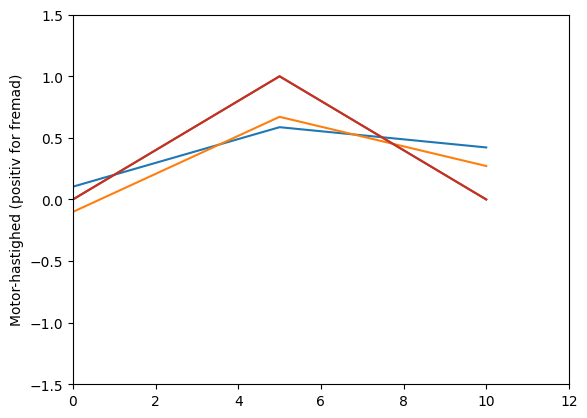

In [51]:
import matplotlib.pyplot as plt

test_afstand = pd.Series([0,5,10])   # x-aksen  (lineær op til 20)

b = model.predict(test_afstand)    #b  er de af netværket estimerede værdier for højre og venstre -motor (2-dimensionelt)
plt.plot(test_afstand,b)           # her plottes b  (orange og blåtyrkis)
plt.plot(Y)                        # Y er træningsdata for output (rød og grøn)
plt.ylabel('Motor-hastighed (positiv for fremad)')
plt.axis((0, 12, -1.5, 1.5))
plt.show()

# mere træning, og plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


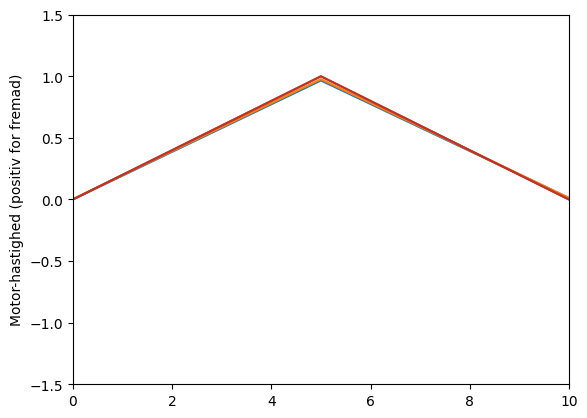

In [52]:
model.fit(X_train, y_train, epochs=7000, batch_size=30, verbose=0)

b = model.predict(test_afstand)    #b  er de af netværket estimerede værdier for højre og venstre -motor (2-dimensionelt)
plt.plot(test_afstand,b)           # her plottes b  (orange og blåtyrkis)
plt.plot(Y)                        # Y er træningsdata for output (rød og grøn)
plt.ylabel('Motor-hastighed (positiv for fremad)')
plt.axis((0, 10, -1.5, 1.5))
plt.show()

In [55]:
a = model.predict(np.array([5,11]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [54]:
print(a)

[[ 0.9657984   0.97625846]
 [-0.13744454 -0.14670902]]
